In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import csv
from collections import defaultdict

In [14]:
array = []
with open("oldMessages.csv") as file_name:
    file_read = csv.reader(file_name)
    array = list(file_read)

 
# print(array)
df = pd.DataFrame(columns=['a', 'b', 'c'])
df.append()

In [ ]:
values = {'Packet': [], 'Temperature in F': [], 'Humidity %rH': [], 'Date': [], 'IR Pixel Temp in F': [], 'eCo2 (ppm)': [], 'TVOC (ppb)': [], 'Raw H2': [], 'Raw Ethanol': [], 'Mic Noise': [], 'Weight (lbs)': []}
for row in range(len(array)):
    if('weight_board' in row[0]):
        pass
    else:
        pass
    

In [3]:
def processValues(df: pd.Series, split: str):
    values = []
    for _, val in df.iteritems():
        values.append(float(val.split(split)[1]))
    return pd.Series(values)


def processDate(df: pd.Series):
    values = []
    for _, val in df.iteritems():
        values.append(datetime.strptime(
            val.split(' ')[2], '%Y/%m/%d/%H:%M:%S').strftime('%H:%M:%S'))
    return pd.Series(values)

In [4]:
columns = {
    'Packet': ':',
    'Temperature in F': ':',
    'Humidity %rH': ':',
    'IR Pixel Temp in F': ':',
    'eCo2 (ppm)': ' ',
    'TVOC (ppb)': ' ',
    'Raw H2': ':',
    'Raw Ethanol': ':',
    'Mic Noise': ':',
    'Weight (lbs)': ':'
}
for name, delim in columns.items():
    df[name] = processValues(df[name], delim)
df['Date'] = processDate(df['Date'])

df.head()
df.to_csv('newMessages.csv', index=False)

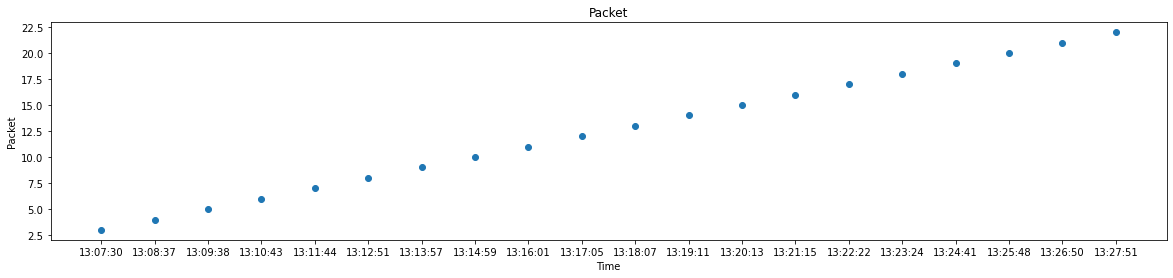

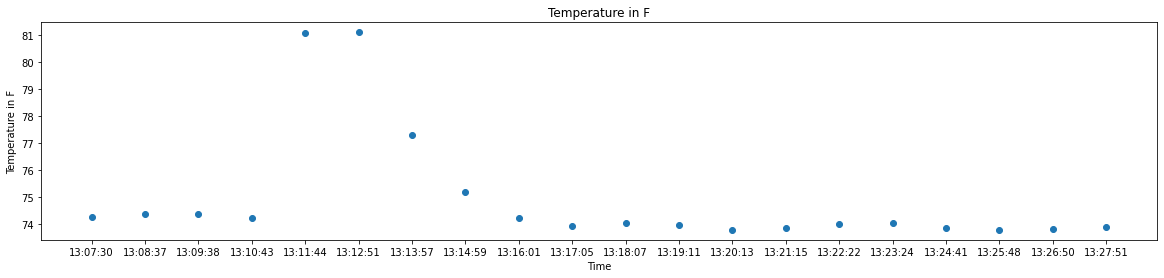

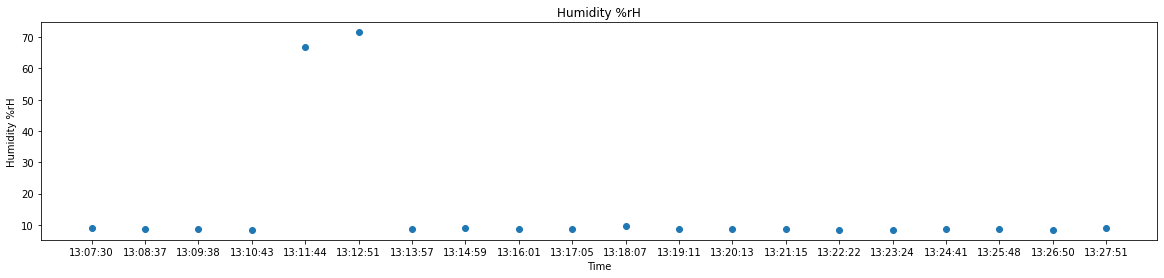

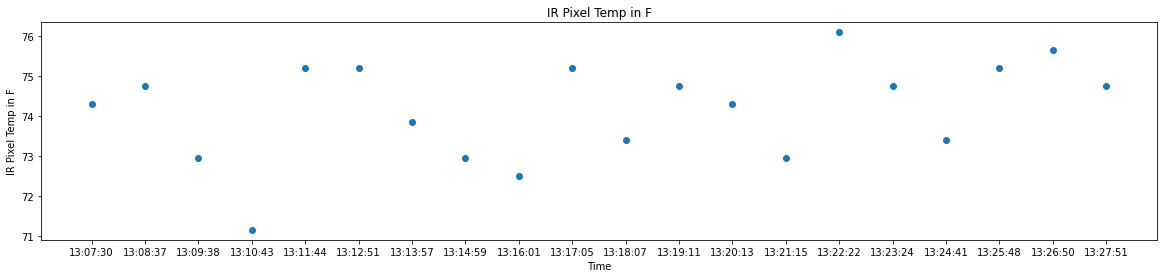

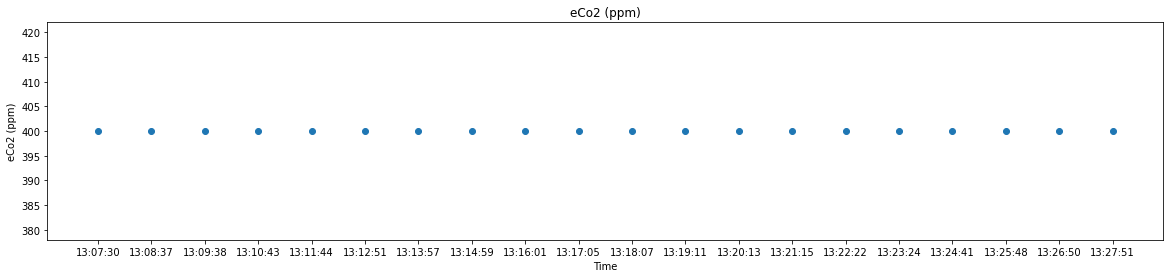

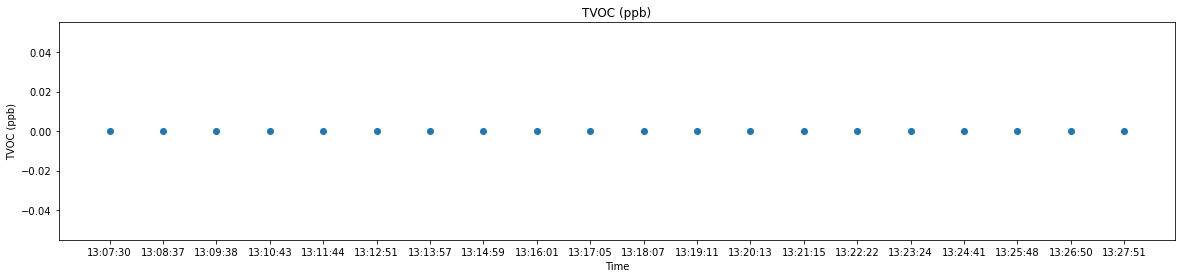

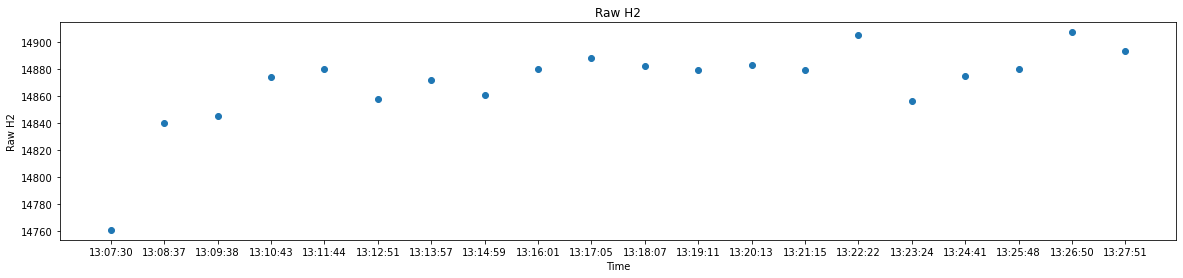

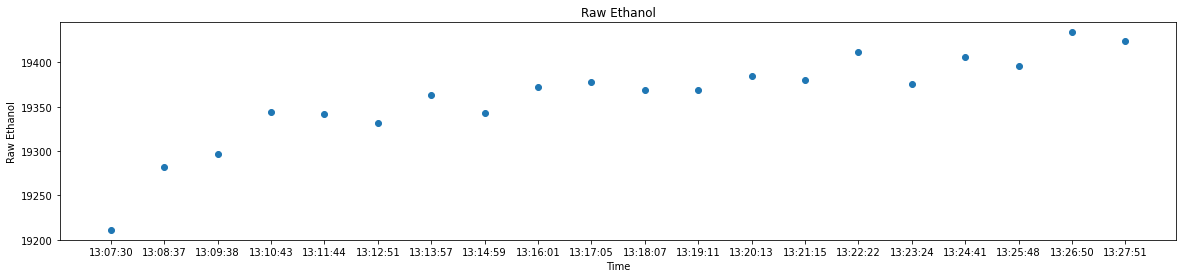

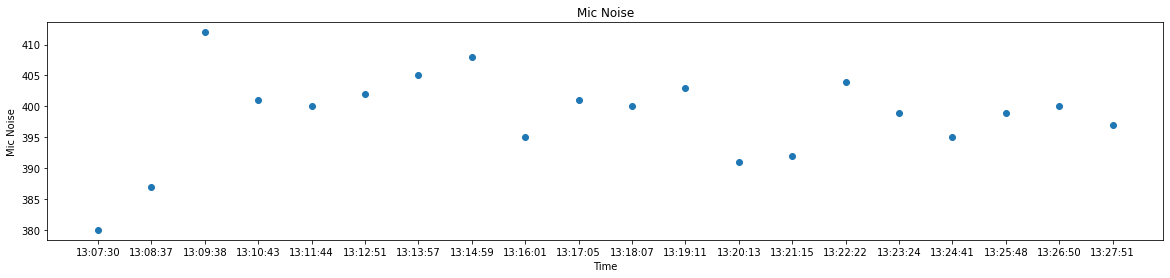

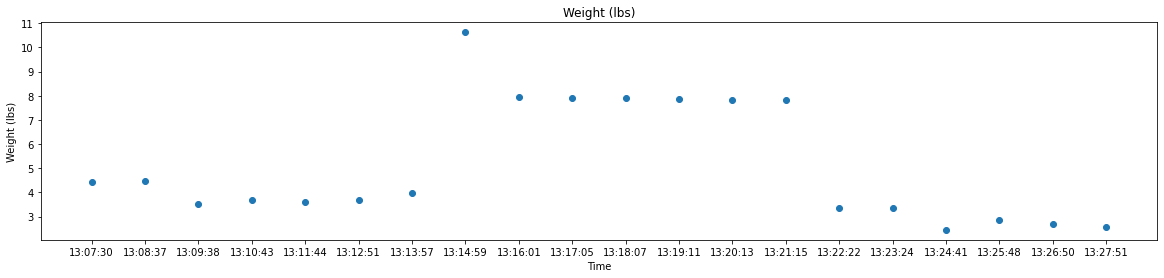

In [5]:
def getGraph(col: str):
    fig, ax = plt.subplots(1, 1)
    _ = ax.scatter(df['Date'], df[col])
    ax.set_xlabel('Time')
    ax.set_ylabel(col)
    ax.set_title(col)
    fig.set_figwidth(20)
    save = 'graphs/' + col + '.jpg'
    fig.savefig(save, bbox_inches='tight')
    # plt.close()

for col in columns.keys():
    getGraph(col)